## _GROUP 1: How has the American diet changed over the past 50 years? Does it seem like it's a positive change?_

<div class="alert alert-block alert-info">
<b> I. EDA + CLEANING DATA
</div>

In [44]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [45]:
# read datasets
file_list = glob.glob('*.csv')
print(file_list)
for f in file_list:
    df = pd.read_csv(f, encoding='ISO-8859-1', low_memory=False)
    var_name = f[:-4]
    exec(var_name + '=df')

['fruitloss.csv', 'heartdisease_stroke.csv', 'perfect_diet_converted.csv', 'adult_obesityUS.csv', 'calories.csv', 'data.csv', 'population.csv', 'losscategory.csv', 'mc_donalds.csv', 'fruitvegloss.csv']


_**Calories Dataset**_

In [46]:
#skip 1st row make 2nd row column names
calories.columns = calories.iloc[0]
#drop first 4 blank rows and all row below valid df
calories = calories.iloc[4:52]
#drop blank cols
calories = calories.dropna(axis=1, how='all')
#temporarily replace NAs with 0
calories = calories.fillna(0)
#change Year 2000* to 2000
calories.replace({'Year': {'2000*': '2000'}}, inplace=True)
#convert obj to int
calories = calories.astype(int)
#calculate % to show in hover data
y_cols = list(set(calories.columns)-set(['Year','Total'])-set(col for col in calories.columns if col.endswith('_%')))
for col in y_cols:
    calories[col+'_%']= (calories[col] / calories['Total']) * 100
    calories[col+'_%'] = calories[col+'_%'].round(decimals=1)

_**Food Loss Dataset**_

In [47]:
losscategory.rename(columns = {'ï»¿category':'category'}, inplace = True)
fruitvegloss.rename(columns = {'ï»¿category':'category'}, inplace = True)

_**Fastfood and Heartstroke Dataset**_

In [48]:
#Clean the datasets
heartdisease_stroke = heartdisease_stroke.drop(columns=['LocationID','LocationAbbr','GeographicLevel','DataSource','Class','Data_Value','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','Confidence_limit_Low','Confidence_limit_High','TopicID'])
heartdisease_stroke = heartdisease_stroke.rename(columns={'LocationDesc': 'City', 'X_long': 'Longitude','Y_lat':'Latitude'})
mc_donalds = mc_donalds.drop(columns=['Store Name','Phone'])
#Count the number of occasions grouped by City
city_health = heartdisease_stroke['City'].value_counts(ascending=False)
city_mcdonalds = mc_donalds['City'].value_counts(ascending=False)
#Extract the index value
index_ = list(city_health.index.values)
index_ = list(city_mcdonalds.index.values)

#Convert the List to a DataFrame
city_health_df = pd.DataFrame(list(zip(index_, city_health)),
               columns =['City', 'Count'])
city_mcdonalds_df = pd.DataFrame(list(zip(index_, city_mcdonalds)),
               columns =['City', 'Count'])

_**Obesity Dataset**_

In [49]:
# list of countries
countries = ["United States", "Mexico", "Canada", "Australia", "United Kingdom", "Germany", "France", "Italy", "Japan", "Brazil", "Russia", "China", "India", "Indonesia", "South Africa", "South Korea", "Turkey", "Argentina", "Spain", "Netherlands"]
# create a subset dataframe using the list of countries
df_subset = data[data['country'].isin(countries)].set_index('country')
# select only the 'obesityRate' column
df_obesity = df_subset[['obesityRate']]

_**Ideal Diet Dataset**_

In [50]:
#dropping null values
Perfect_diet = perfect_diet_converted.dropna()
Perfect_diet = Perfect_diet.set_index(Perfect_diet.columns[0])

<div class="alert alert-block alert-info">
<b> II. CREATE CHARTS
</div>

In [51]:
# CHI
def calories_chart():
    fig = px.bar(calories[calories['Year']<=2010], x='Year', y=y_cols,\
                 title='<b>AMERICANS AVERAGE DAILY PER CAPITA CALORIE CONSUMPTION BREAKDOWN BY FOOD TYPE<b>',\
                 color_discrete_sequence=px.colors.qualitative.Safe,\
                 hover_data=[col for col in calories.columns if col.endswith('_%')])\
    .update_xaxes(tickangle=-90)\
    .update_yaxes(title_text='Calorie')\
    .update_layout(legend=dict(font=dict(size=11), yanchor='bottom', y=0.2, xanchor='right', x=-0.1),\
                   bargap=0.05)\
    .add_shape(type='line',x0=1970, y0=2000, x1=2010, y1=2000, line=dict(color='blue', width=1.2, dash='dot'))\
    .add_annotation(x=1977, y=2000, text='Recommended Daily Intake (women)', showarrow=True, arrowhead=2)\
    .add_shape(type='line',x0=1970, y0=2500, x1=2010, y1=2500, line=dict(color='blue', width=1.2, dash='dot'))\
    .add_annotation(x=1990, y=2500, text='Recommended Daily Intake (men)', showarrow=True, arrowhead=2)
    return fig

In [52]:
# NIKKI
def loss_chart(data):
    df=data
    category = data['category'].unique()
    fig, ax = plt.subplots(1, figsize=(6,6))
    for i in category:
        cal = data[data['category'] == i]
        plt.plot(cal.year, cal.value, marker='o', markersize=5)
        plt.text(cal.year.values[0]+0.02, cal.value.values[0], i)
        plt.text(cal.year.values[1]-0.02, cal.value.values[1], i, ha='right')
        yticks = plt.yticks()[0]
    plt.xlim(1965.5,2015.5)
    plt.xticks([1970, 2010])
    return

In [53]:
# LILY
def map_chart(data):
    color_scale = [(0, 'orange'), (1,'red')]
    fig = px.scatter_mapbox(data, 
                            lat="Latitude", 
                            lon="Longitude", 
                            hover_name="City", 
                            hover_data=["City"],
                            zoom=8, 
                            height=800,
                            width=800)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig

def correl_chart():
    population.plot.scatter(x='Heart_Disease_Count_per_Capita', y='Mc_Count_per_Capita',rot=0, figsize=(7,5), fontsize=12)
    plt.title("Heart Disease and McDonalds Correlations")
    plt.xlabel("Heart_Disease_Count_per_Capita")
    plt.ylabel("Mc_Count_per_Capita")
    return

In [54]:
# VIKRANT
def obesity_chart():
    plt.plot(adult_obesityUS["Year"], adult_obesityUS["BMI"], marker="o")
    # Add title and labels for the X and Y axis
    plt.title("Share of American adults that are overweight or obese")
    plt.xlabel("Year")
    plt.ylabel("Prevalence of overweight among adults")
    # Set the lower limit of the y-axis to 0 and upper limit to 75
    plt.ylim(bottom=0, top=75)
    plt.xlim(left=1970,right=2020)
    return

def obesity_gdp_chart():
    df_obesity = data[data['country'].isin(countries)].set_index('country')
    ninty_percentile = data['obesityRate'].quantile(0.9)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_obesity, x=df_obesity.index, y='obesityRate', alpha=0.7, s=100)
    plt.axhline(ninty_percentile, color='red', linestyle='--', label='90th percentile')
    plt.xticks(rotation=90)
    plt.title("Obesity Rate of 20 Countries with high GDP", fontsize=20, fontweight='bold')
    plt.xlabel("Country", fontsize=15)
    plt.ylabel("% of obese adults", fontsize=15)
    plt.legend(fontsize=15)
    sns.despine()
    return

In [55]:
# LUIS
def perfect_diet_chart():
    group_names = ['Vegetables \n (cup)', 'Fruits \n (cup)', 'Grains \n (oz)', 'Dairy \n (cup)', 'Protein \n (oz)']

    # Data for chart
    data_1970 = Perfect_diet['1970'].head() #dropping oils
    data_2010 = Perfect_diet['2010'].head() #dropping oils
    data_difference = data_2010 - data_1970

    # Data for line
    optimal_data = Perfect_diet['Daily Amount of Food From Each Group (converted)'].head() #dropping oils

    # Plot the stacked bar chart
    fig, ax = plt.subplots()
    ax.bar(group_names, data_1970, label='1970 Consumption', color='lightblue', edgecolor='black')
    ax.bar(group_names, data_difference, bottom=data_1970, label='2010 Consumption', color='darkblue', edgecolor='black')

    # Plot the line chart on top of the stacked bar chart
    ax.plot(group_names, optimal_data, color='red', linewidth=2, label='Optimal Levels', linestyle = '--',)

    # Add labels and legend
    ax.set_xlabel('Food Groups')
    ax.set_ylabel('Cups or Ounces per day')
    ax.set_title('HOW THE AMERICAN DIET HAS CHANGED BETWEEN 1970 vs. 2010 AND HOW DOES IT COMPARE TO OPTIMAL LEVELS')
    ax.legend()
    
    #Annotations
    ax.annotate('2.5', xy=(0, 2.5), xytext=(0, 3.5),
                arrowprops=dict(facecolor='red', shrink=0.01),
                )
    ax.annotate('2.0', xy=(1, 2), xytext=(1, 3),
                arrowprops=dict(facecolor='red', shrink=0.01),
                )
    ax.annotate('6.0', xy=(2, 6), xytext=(2, 4),
                arrowprops=dict(facecolor='red', shrink=0.01),
                )
    ax.annotate('3.0', xy=(3, 3), xytext=(3, 4),
                arrowprops=dict(facecolor='red', shrink=0.01),
                )
    ax.annotate('4.43', xy=(4, 4.43), xytext=(4, 5.43),
                arrowprops=dict(facecolor='red', shrink=0.01),
                )
    # Show the plot
    plt.show()
    return

<div class="alert alert-block alert-info">
<b> III. SHOW CHARTS
</div>

In [56]:
calories_chart()

**COMMENT**:
- Overall calories increases
- Nearly half of the calories come from just two food groups - which are gaining ones: flours and grains (581 calories, or 23.4%) and fats and oils (575, or 23.2%), up from a combined 37.3% in 1970. 
- Meats, dairy and sweeteners provide smaller shares of our daily caloric intake than they did four decades ago
- So do fruits and vegetables (7.9% in 2010 versus 9.2% in 1970)

***

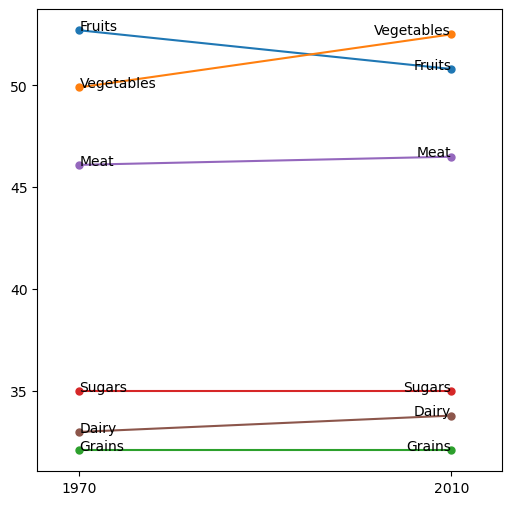

In [57]:
loss_chart(losscategory)

**COMMENTS:** Food Availability is associated with consumption  
- Across the world, we are currently wasting 2.5 billion tons of food each and every year. 
- The data becomes even more interesting when looking in detail at what food category is actually wasted the most
- The  economic result of food loss and waste is larget and even larger for the vulnerable populations as food becomes less available or prices are affected leading to food insecurity. 
- There is a strong business and food security case for addressing the food loss/waste challenge.
- Vegetable loss has increased by 3.5% in the past 40 years,  over 50% of vegetables are lost or wasted in transit, at the supermarket, at home, etc, 
- 50% of fruits are lost, this has became more efficient - may link to increase in consumption? 
- Only around a third of grains and sugars are lost and this has become more efficient over time 
- Meat and dairy loss has slightly increased but these categories are more efficient. Alot of meat is lost but the problem hasnt been as worse as fruit or veggies

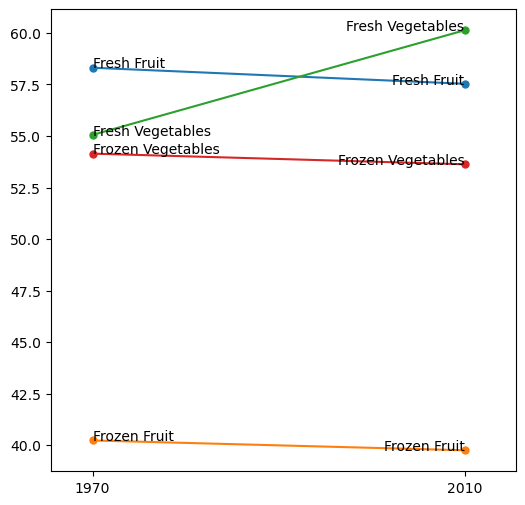

In [58]:
loss_chart(fruitvegloss)

**COMMENTS:** Why are so many fruits/ vegetables lost? 
- as you can see there is a major inefficiency with fresh vegetables, the drive the loss of the category, 60% are wasted as of 2010. Fresh fruit loss has become more efficient, linking to increased calorie intake. 
- recommendation -> shift to frozen fruits and vegetables as less is wasted and this process has become more efficient in the past 40 years

***

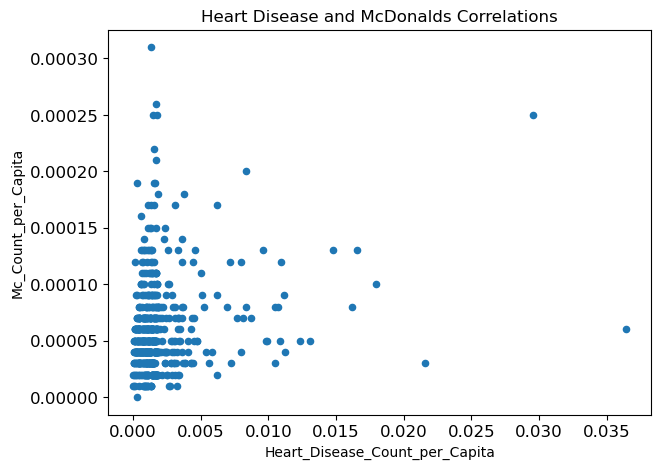

In [59]:
correl_chart()

**COMMENTS:** Correlations between Heart Desease and Diet
- Does diet really affect your health?
- Food availability and food consumption is positively related.
- Will the cities where fast food is more available also have higher heart disease rate?

***

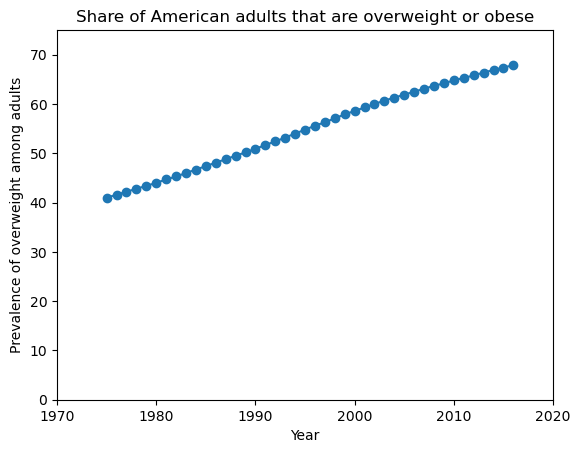

In [60]:
obesity_chart()

**COMMENTS:** 
- A person is defined as overweight if they have a body-mass index (BMI) equal to or greater than 25. BMI is a person's weight in kilograms divided by his height in metres squared
- The prevalence of obesity among American adults has significantly increased over the last 50 years.
- Reasons why there is an upward trend :
    - Consumption of foods that are high in calories, fats and sugars.
    - Lack of Physical activities.

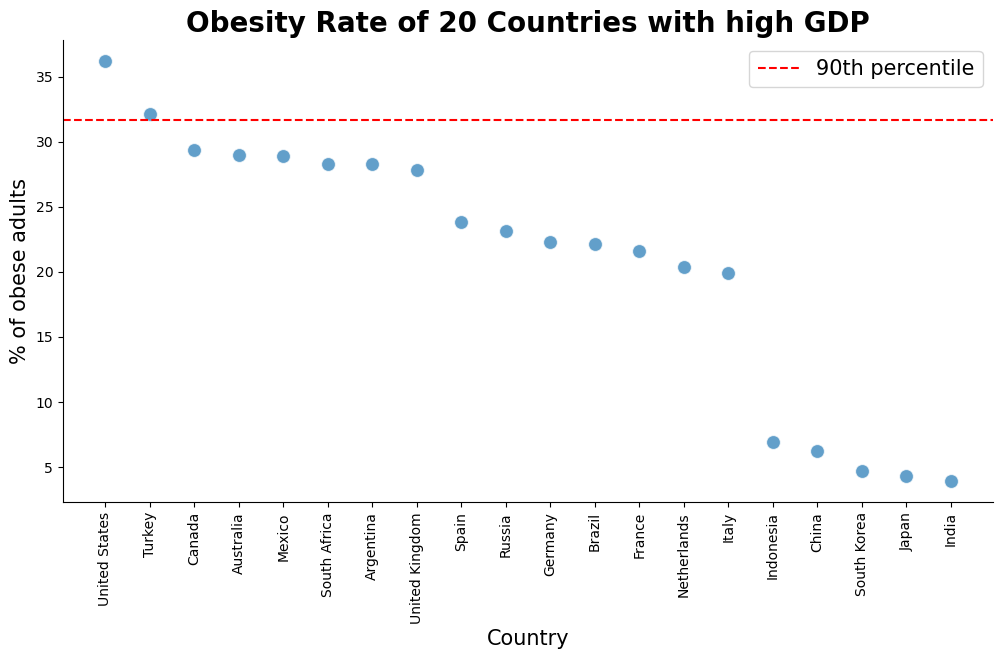

In [61]:
obesity_gdp_chart()

**COMMENT**:
- This Scatterplot shows the obesity rate in 20 leading countries with a high GDP.
- Obesity rates vary significantly by country as a result of different lifestyles and diets. There is no direct correlation between the obesity rate of a country and its economic status. However, we can conclude that the US has a significantly high percentage of Obese adults when compared to the other countries.

***

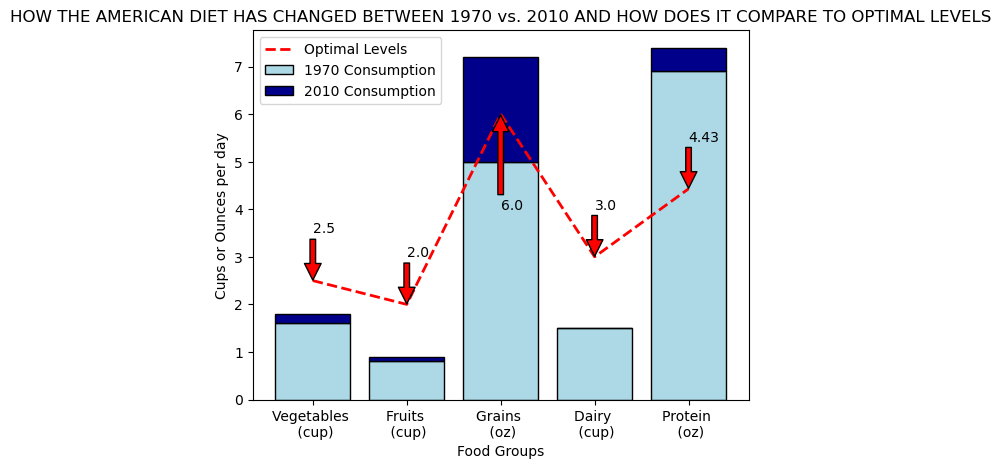

In [62]:
perfect_diet_chart()

**COMMENTS**:
* Vegetable and Fruit consumption seem to be headed in right the direction, but still far.
* However, Dairy has been stagnant and Grains and Proteins have grown and are not necessarily closed to optiomal levels.